# 2주차: Decision Tree

와인 데이터를 이용해서 Decision Tree 모델 실습

## 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 데이터 로드

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [3]:
red_wine['color'] = 1.
white_wine['color'] = 0.

data = pd.concat([red_wine, white_wine])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


### 와인 데이터셋 컬럼 설명

*   `fixed acidity`: 고정 산도 (와인의 신맛에 영향)
*   `volatile acidity`: 휘발성 산도 (높으면 식초와 같은 신맛이 강해짐)
*   `citric acid`: 시트르산 함량 (신선한 신맛을 더함)
*   `residual sugar`: 잔류 당분 (와인의 단맛을 결정)
*   `chlorides`: 염화물 함량 (와인의 짠맛에 영향)
*   `free sulfur dioxide`: 자유 이산화황 (산화 및 미생물 번식 방지)
*   `total sulfur dioxide`: 총 이산화황 (첨가된 총 이산화황의 양)
*   `density`: 밀도 (당분과 알코올 함량에 영향)
*   `pH`: pH (와인의 산성도, 낮을수록 산성)
*   `sulphates`: 황산염 함량 (쓴맛과 항산화 작용)
*   `alcohol`: 알코올 함량 (와인의 도수)
*   `quality`: 품질 점수 (높을수록 좋은 품질)
*   `color`: 와인의 색깔 (레드 와인/화이트 와인 구분)

In [ ]:
# describe() 메서드 사용
description = data.describe()
print(description)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

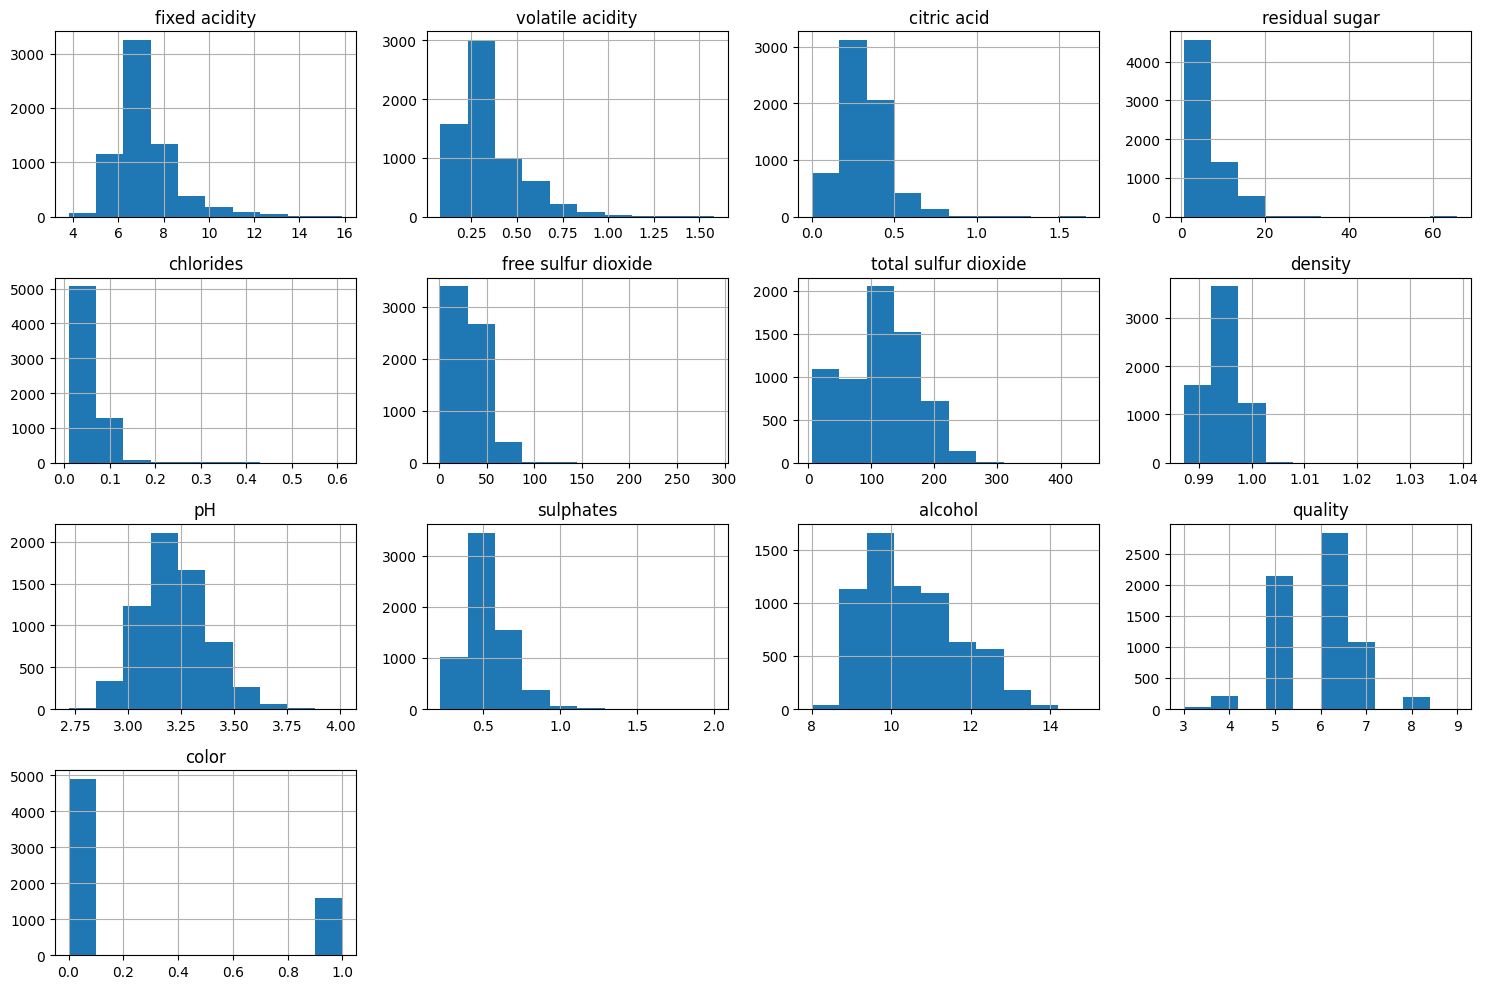

In [ ]:
# Histogram (각 컬럼별로 subplot 생성)
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Decision Tree 기본

In [5]:
data['quality_group'] = pd.qcut(data['quality'], 3, labels=[0, 1, 2])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,2


In [6]:
# 데이터 분할
X = data.drop(['quality', 'quality_group'], axis=1)
y = data['quality_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 1. 기본적인 DecisionTree 학습, 트리 시각화, 테스트 정확도
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

In [9]:
print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.6292307692307693


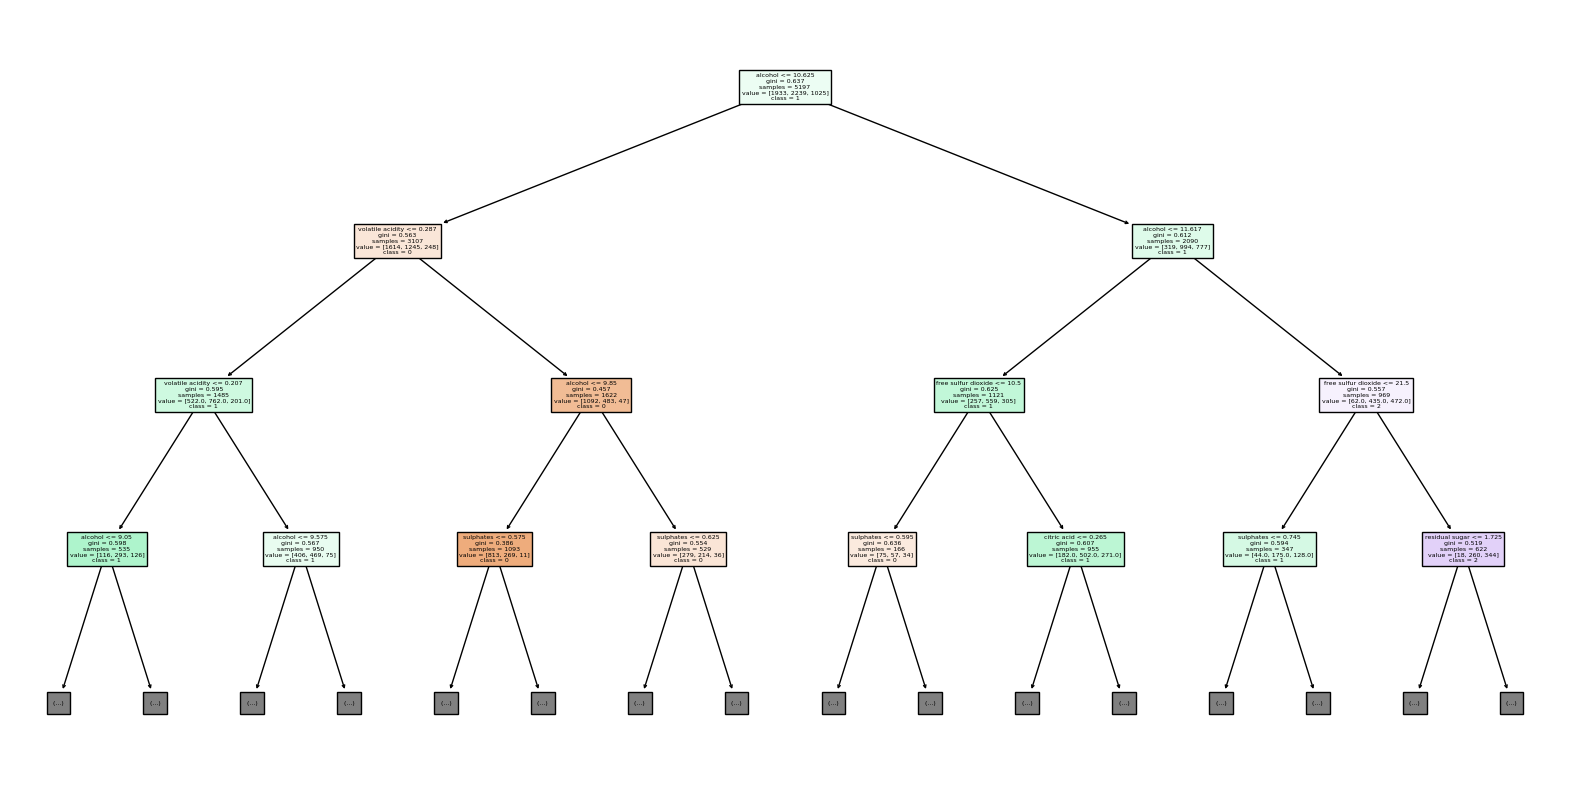

In [10]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3) # class_names 추가 및 max_depth 제한
plt.show()

## 노드 수에 따른 정확도 변화

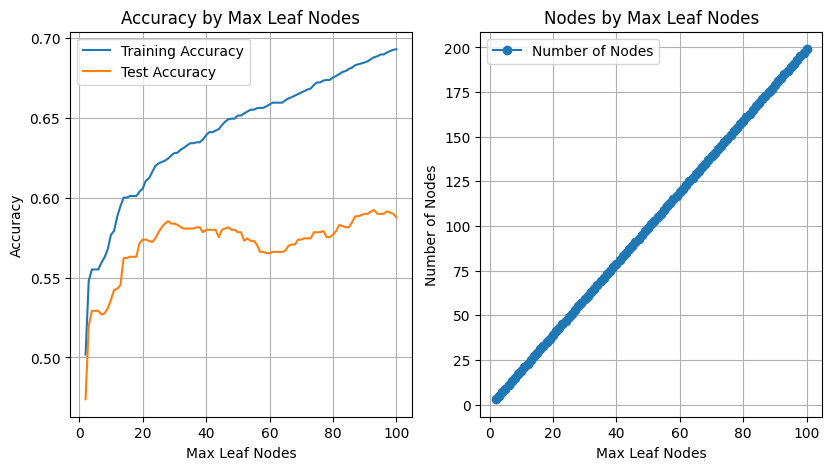

In [11]:
# 2. max_leaf_nodes 조절에 따른 정확도 및 노드 수 변화
train_accuracies = []
test_accuracies = []
node_counts = []
leaf_nodes = range(2, 101, 1)

for leaf in leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))
    node_counts.append(dt.tree_.node_count)

# 그래프 그리기
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(leaf_nodes, train_accuracies, label='Training Accuracy')
plt.plot(leaf_nodes, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy by Max Leaf Nodes')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(leaf_nodes, node_counts, marker='o', linestyle='-', label='Number of Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Number of Nodes')
plt.title('Nodes by Max Leaf Nodes')
plt.legend()
plt.grid(True)

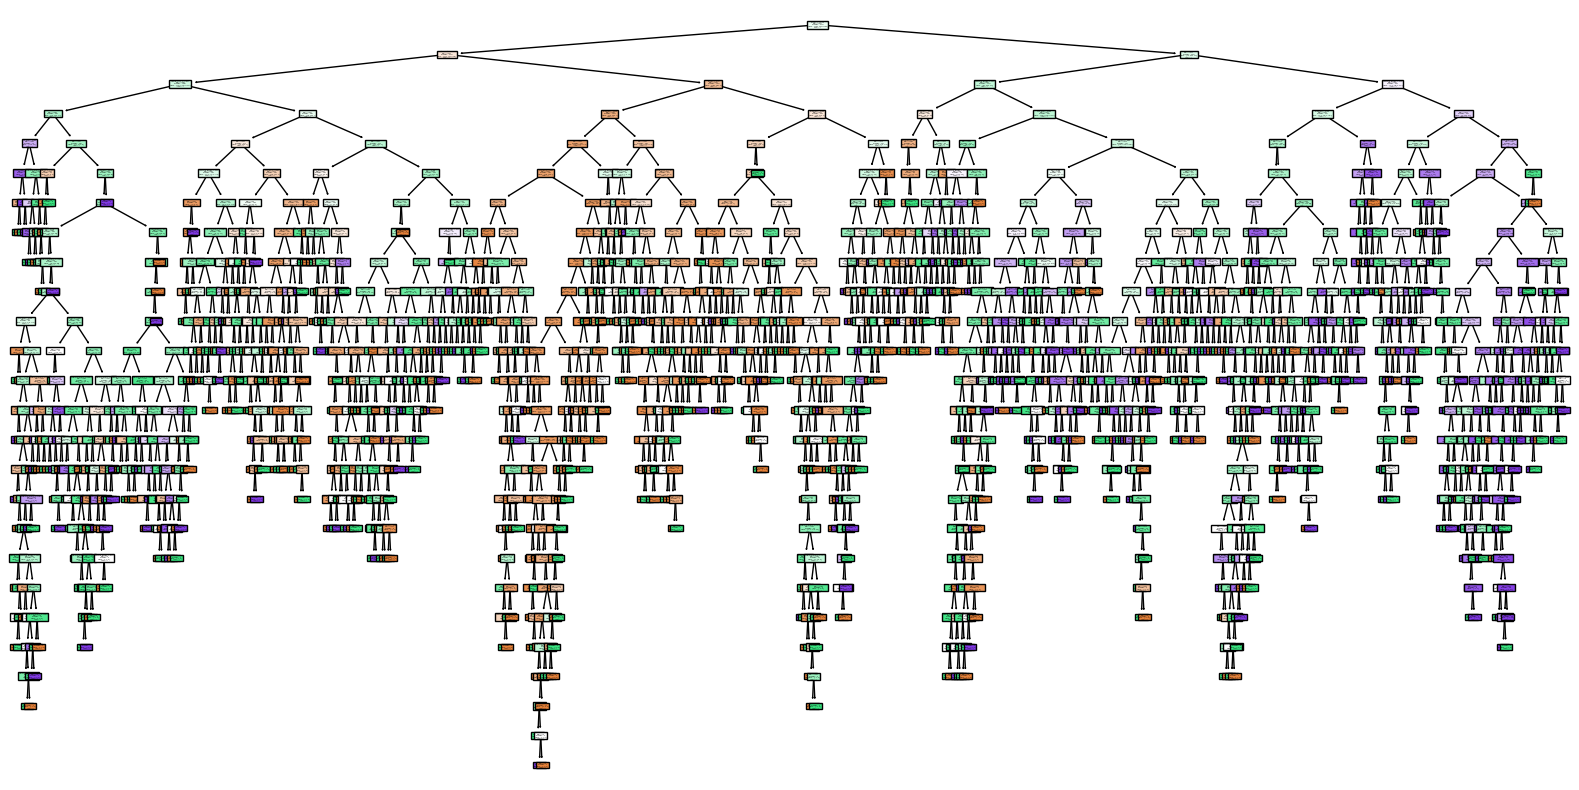

In [12]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()

## 하이퍼 파라미터

In [13]:
# 데이터 분할
X = data.drop(['color', 'quality_group'], axis=1)
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.98


최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 17, 'max_leaf_nodes': 85, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
최적 하이퍼 파라미터의 정확도: 0.9865314281483677
최적 모델의 테스트 정확도: 0.9823076923076923


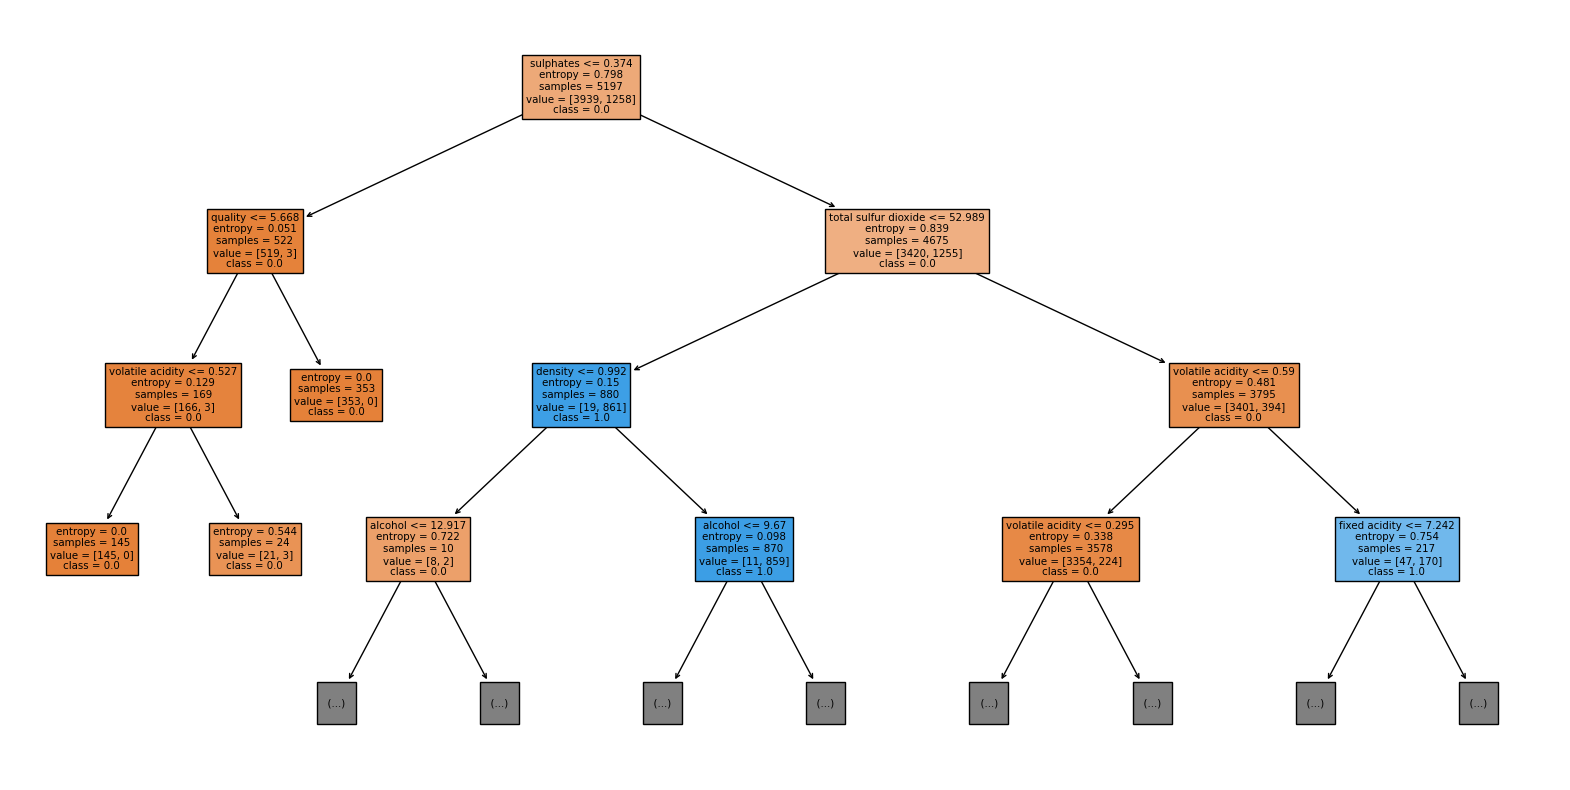

In [15]:
# 3. GridSearchCV로 최적의 하이퍼 파라미터 서치 후 트리 시각화, 정확도 확인
param_grid = {
    'max_depth': range(3, 21, 2),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 6, 2),
    'max_leaf_nodes': range(10, 101, 5),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("최적 하이퍼 파라미터의 정확도:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("최적 모델의 테스트 정확도:", accuracy_best)

plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3)
plt.show()

# 과제

자동차 평가 데이터 베이스를 이용한 Decision Tree 실습

Bohanec, M. (1988). Car Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.

In [16]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [18]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [19]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


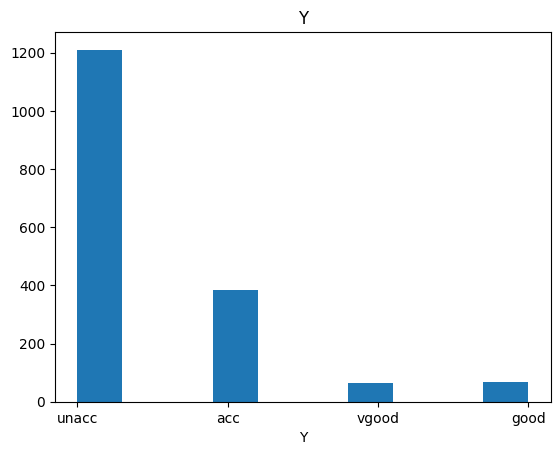

In [20]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('Y')
plt.title('Y')
plt.show()

## 데이터셋 컬럼 설명

*   `buying`: 구매 가격
*   `maint`: 유지 보수 비용
*   `doors`: 문의 개수
*   `persons`: 탑승 가능 인원 수
*   `lug_boot`: 수납 공간 크기
*   `safety`: 안전 등급

## 1. Decision Tree 기본으로 성능 확인

In [21]:
# TODO: 데이터를 트레인 데이터와 테스트 데이터로 나눈 뒤 Decision Tree에 학습시켜서 테스트 데이터 정확도가 얼마나 나오는지 확인
# Tip: X값이 범주형일 경우 수치형으로 인코딩을 해줘야 합니다.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_X = X.apply(encoder.fit_transform)
new_X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
from sklearn.metrics import accuracy_score

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.9682080924855492


## 2. 최적의 하이퍼파라미터 성능 내보기

In [25]:
# TODO: 데이터에 알맞는 Decision Tree의 최적의 하이퍼 파라미터를 GridSearch를 통해 찾아보고 테스트 데이터 정확도 출력

param_grid = {
    'max_depth': range(3, 21, 2),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 6, 2),
    'max_leaf_nodes': range(10, 101, 5),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("최적 하이퍼 파라미터의 정확도:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 13, 'max_leaf_nodes': 70, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
최적 하이퍼 파라미터의 정확도: 0.9783027258933711


## 3. 다른 앙상블 모델 사용해보기

In [27]:
# TODO: Decision Tree가 아닌 다른 앙상블 모델에 훈련 데이터를 학습시켜서 테스트 데이터 정확도 확인

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print(accuracy_score(y_test, pred))

0.6965317919075145


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [28]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print(accuracy_score(y_test, cat_pred))

Learning rate set to 0.080443
0:	learn: 1.2747397	total: 59.1ms	remaining: 59s
1:	learn: 1.1841897	total: 59.5ms	remaining: 29.7s
2:	learn: 1.0917365	total: 60ms	remaining: 19.9s
3:	learn: 1.0146716	total: 60.6ms	remaining: 15.1s
4:	learn: 0.9484367	total: 61.1ms	remaining: 12.2s
5:	learn: 0.8942902	total: 61.7ms	remaining: 10.2s
6:	learn: 0.8467037	total: 62.2ms	remaining: 8.83s
7:	learn: 0.7991621	total: 62.7ms	remaining: 7.78s
8:	learn: 0.7620082	total: 63.3ms	remaining: 6.97s
9:	learn: 0.7306231	total: 63.7ms	remaining: 6.31s
10:	learn: 0.7059670	total: 64.2ms	remaining: 5.77s
11:	learn: 0.6750653	total: 64.7ms	remaining: 5.33s
12:	learn: 0.6392183	total: 65.3ms	remaining: 4.96s
13:	learn: 0.6139459	total: 65.9ms	remaining: 4.64s
14:	learn: 0.5952254	total: 66.5ms	remaining: 4.37s
15:	learn: 0.5716494	total: 67ms	remaining: 4.12s
16:	learn: 0.5468314	total: 67.7ms	remaining: 3.91s
17:	learn: 0.5266589	total: 68.2ms	remaining: 3.72s
18:	learn: 0.5079764	total: 68.7ms	remaining: 3.55

In [29]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
print(accuracy_score(y_test, lgbm_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 6
[LightGBM] [Info] Start training from score -1.524177
[LightGBM] [Info] Start training from score -3.170844
[LightGBM] [Info] Start training from score -0.348850
[LightGBM] [Info] Start training from score -3.360086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## 최종 분석

1. 선택한 앙상블 모델에 대한 간단한 설명
2. 3가지 실행 정확도 결과에 대한 비교 분석

## 1

### 부스팅 모델
세 앙상블 모델 모두 부스팅 모델에 속한다.

**부스팅 모델**이란, 틀린 부분에 가중치를 더하며 학습을 진행하는 알고리즘을 의미한다.

이는 또 크게 두 가지 종류로 구분할 수 있는데, *중요한 데이터에 weight를 주는 방식*(adaboost)와, *경사 하강법을 적용하여 모델을 개선하는 방식*(catboost, lightgbm)이 존재한다.

#### AdaBoost
- 이전 모델이 잘못 분류한 샘플에 가중치를 부여하여 학습하는 알고리즘
- *사용하기 편하다*는 장점을 가짐.
- *쉽게 과적합*되고, *노이즈 데이터와 이상치에 민감*하다는 단점을 가짐.

#### CatBoost
- 기존의 Boosting과 다르게, 일부 데이터로 잔차 계산을 한 뒤 이 결과롤 다시 모델을 만드는 과정을 거침. -> *과적합 감소*
- 범주형 변수를 처리하는 독자적인 처리 방법ㅇ르 가짐 (Response encoding, Categorical Feature Combination)

#### LightGBM
- leaf-wise 분할을 진행 -> 트리가 수직적으로 깊어지는 방향으로 생성됨.
- 학습 시간이 짧다는 장점을 가짐.

## 2

decision tree 사용 시, 0.968의 정확도를 얻었고, GridSearchCV를 통한 파라미터 최적화 적용 후 0.978의 정확도를 얻었다. 이는 기존 아무 최적화를 거치지 않은 트리에 비해 0.01의 성능 향상을 얻은 것이다.

앙상블 모델 적용 시에는 AdaBoost는 0.696이라는 낮은 정확도를 보였고, LightGBM은 0.976, CatBoost는 튜닝을 거치지 않고도 무려 0.988이라는 높은 정확도를 보였다. LightGBM, CatBoost 둘 모두 튜닝을 거치지 않고도 튜닝을 진행한 decision tree와 유사하거나 더 높은 정확도를 나타낸 것으로 보아, 이후 추가적인 튜닝을 진행할 시 더 좋은 결과를 얻어낼 수 있을 것으로 보인다. 또한, AdaBoost의 결과를 통해, 단순히 부스팅을 진행한다고 해서 좋은 결과를 얻을 수 있는 것이 아니라, 어떤 모델을 적용하는 지도 크게 중요하다는 사실을 알 수 있었다.